In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('hc_ds_glassdoor_jobs.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Same_State,Comp_Age,job_title,Seniority,job_desrcipt_lc,python,sql,aws,scala,pyspark
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,52,data scientist,na,3490,0,1,0,0,0
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,...,1,35,data scientist,na,4376,1,1,0,0,0
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,...,0,84,data scientist,na,3785,1,1,1,0,0
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,data scientist,na,5144,0,0,0,0,0
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,0,109,data scientist,na,5423,1,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dfd2828>,
      dtype=object)

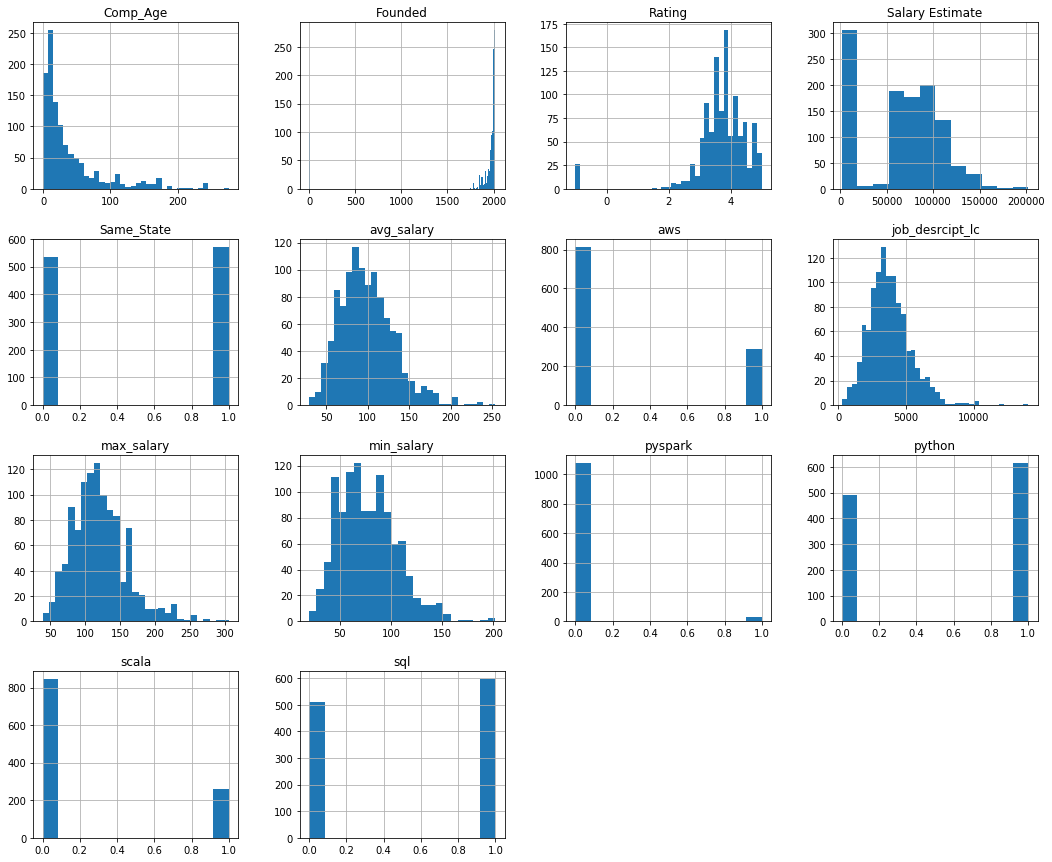

In [6]:
df.hist(figsize=(18,15), bins='auto')

In [7]:
abs(df.corr()) > 0.75

,Salary Estimate,Rating,Founded,min_salary,max_salary,avg_salary,Same_State,Comp_Age,job_desrcipt_lc,python,sql,aws,scala,pyspark
Salary Estimate,True,False,False,True,True,True,False,False,False,False,False,False,False,False
Rating,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Founded,False,False,True,False,False,False,False,False,False,False,False,False,False,False
min_salary,True,False,False,True,True,True,False,False,False,False,False,False,False,False
max_salary,True,False,False,True,True,True,False,False,False,False,False,False,False,False
avg_salary,True,False,False,True,True,True,False,False,False,False,False,False,False,False
Same_State,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Comp_Age,False,False,False,False,False,False,False,True,False,False,False,False,False,False
job_desrcipt_lc,False,False,False,False,False,False,False,False,True,False,False,False,False,False
python,False,False,False,False,False,False,False,False,False,True,False,False,False,False


^^^Above can see no multicollinearity. Only high correlation between salary estimate and min_salary, max_salary, avg_salary, which is expected. Avg_salary will only be used because its the target variable

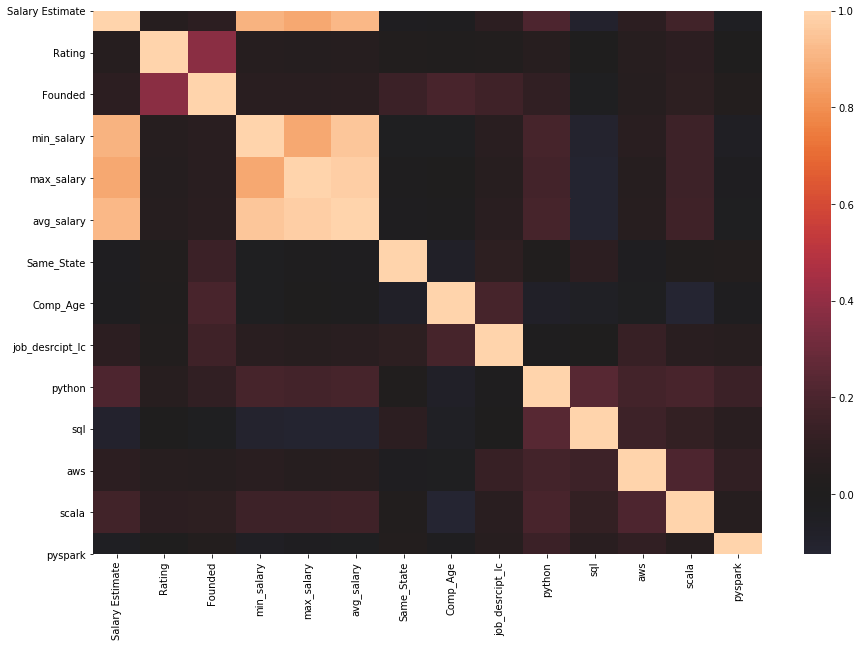

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), center=0)

###### Bar Charts

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'CompName', 'State',
       'Same_State', 'Comp_Age', 'job_title', 'Seniority', 'job_descript_lc',
       'python', 'sql', 'aws', 'scala', 'pyspark'],
      dtype='object')

In [34]:
df_columns = df[['Rating','Size', 'Type of ownership','Sector','Revenue','avg_salary','State','Same_State','Comp_Age','job_title','Seniority','job_descript_lc','python','sql','aws','scala','pyspark']]

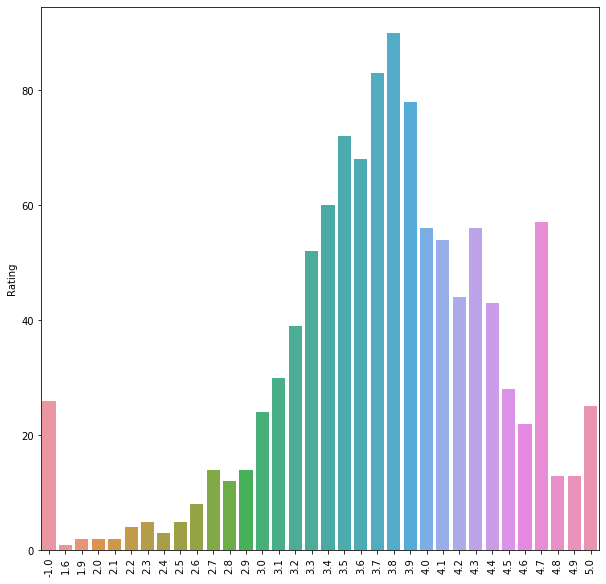

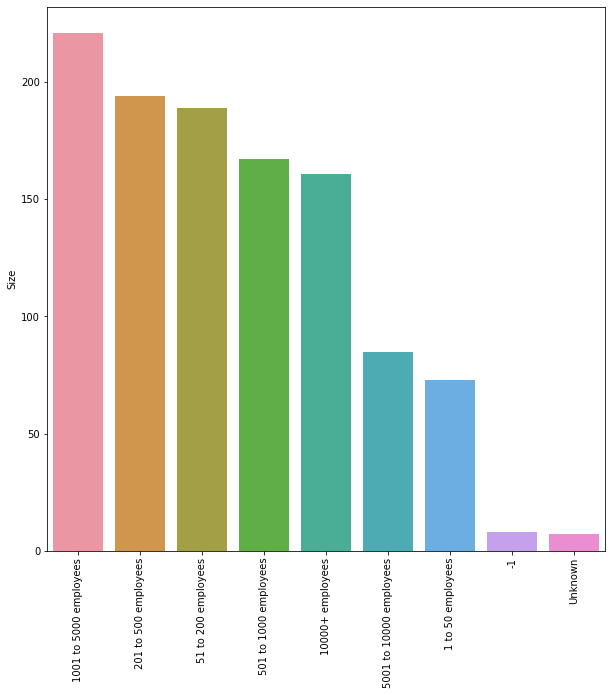

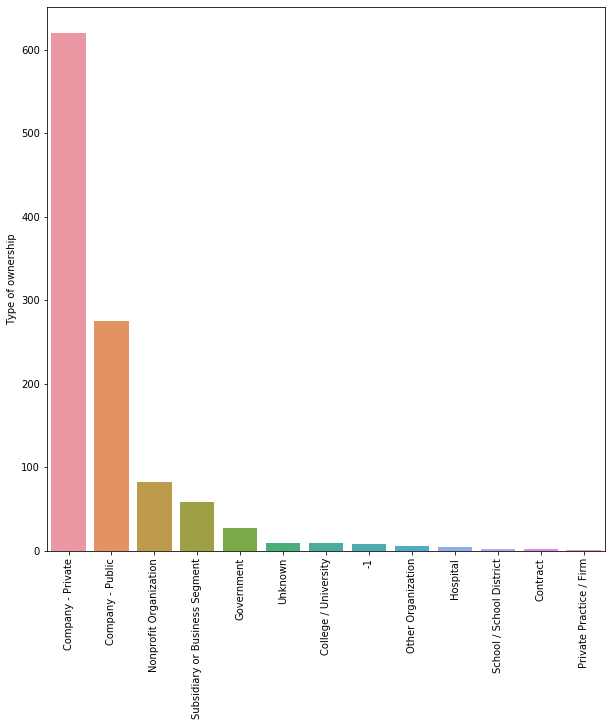

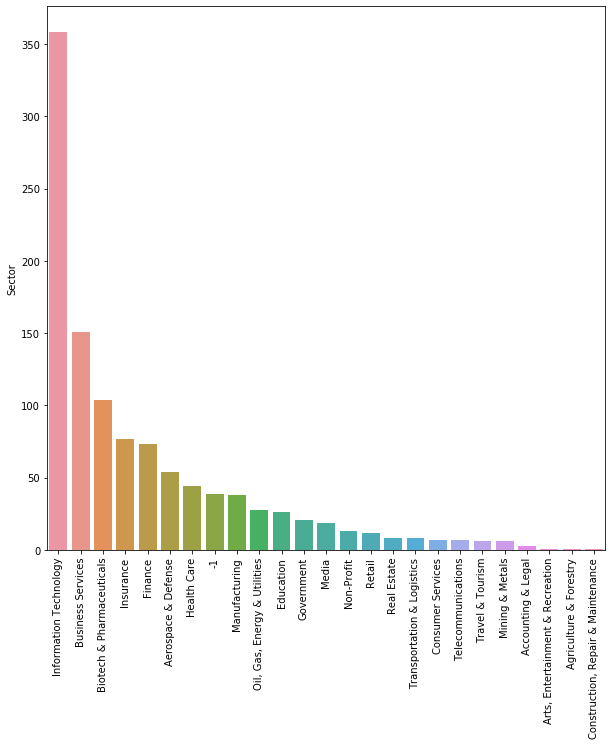

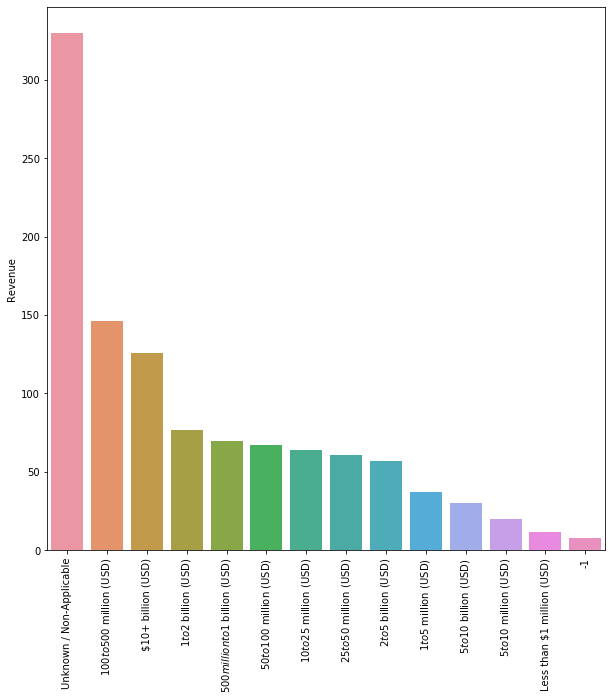

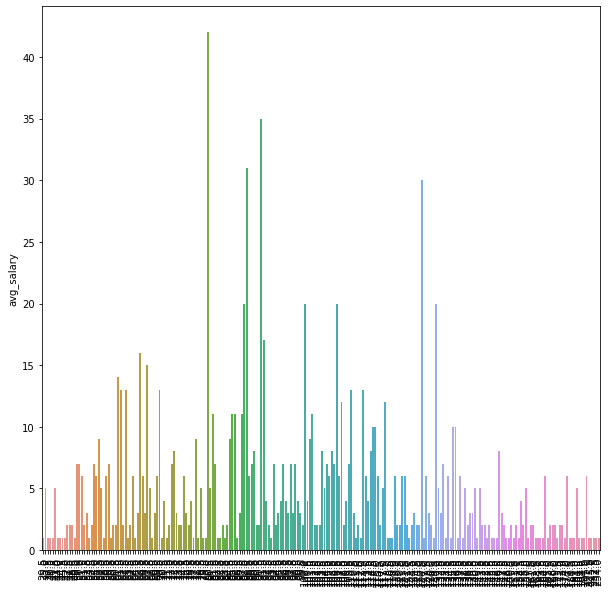

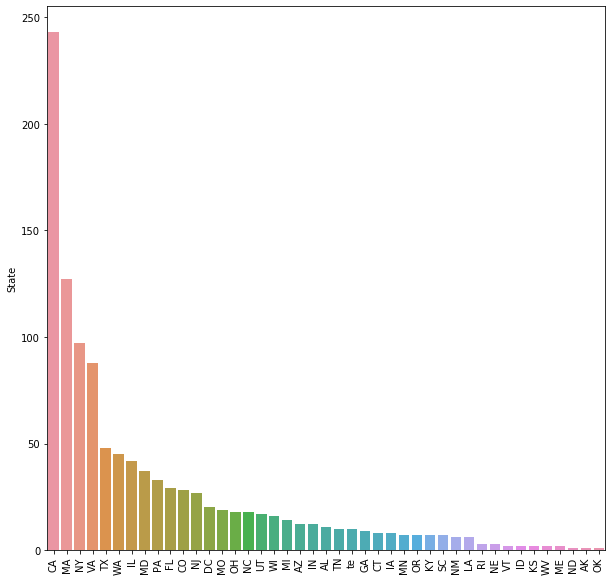

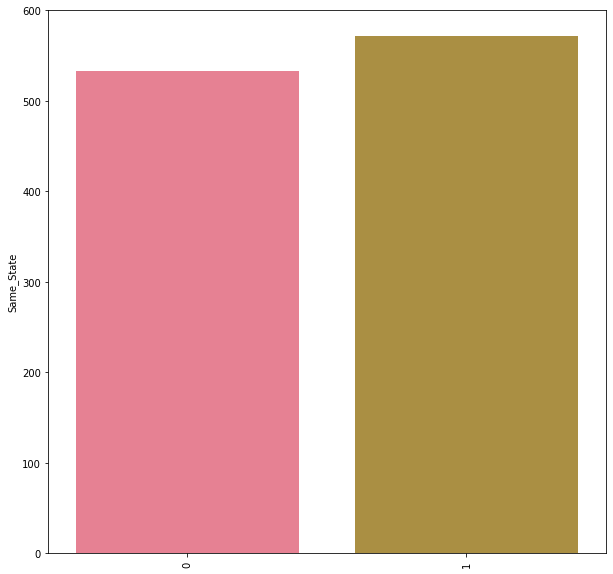

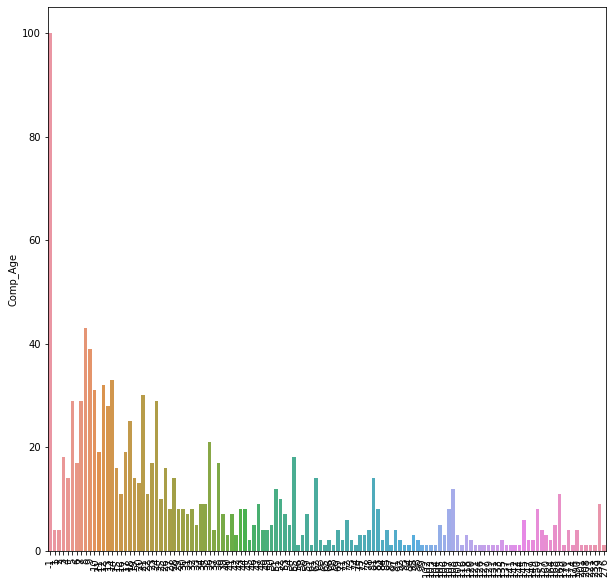

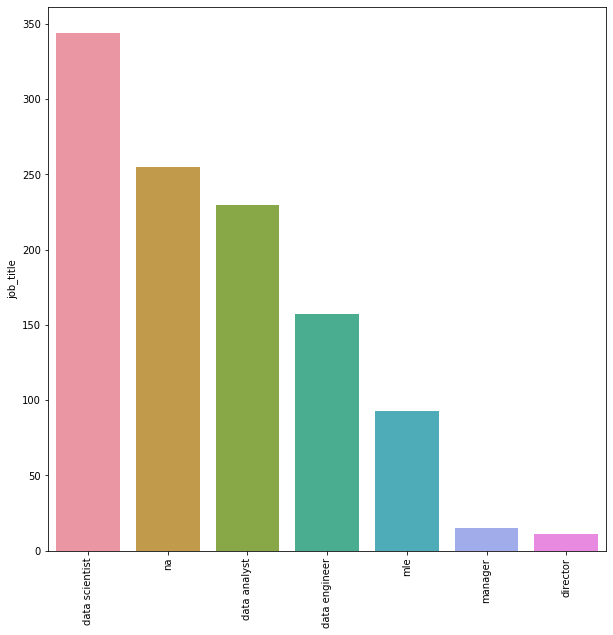

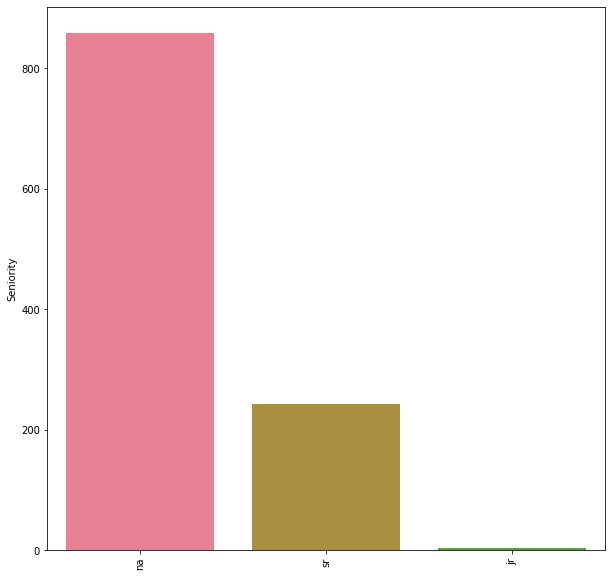

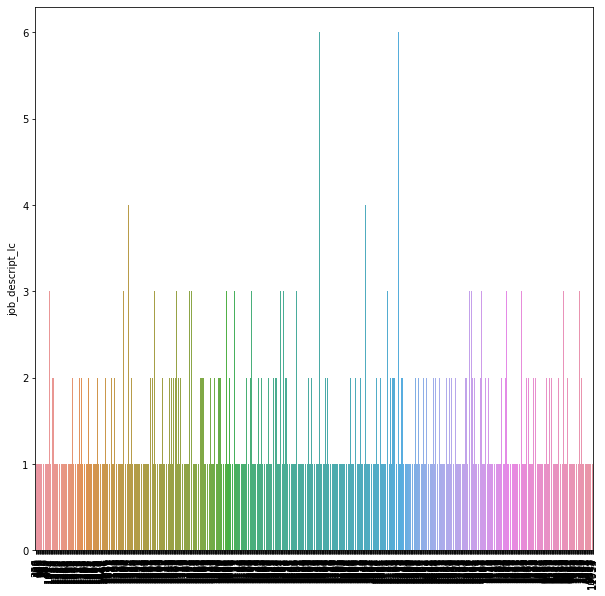

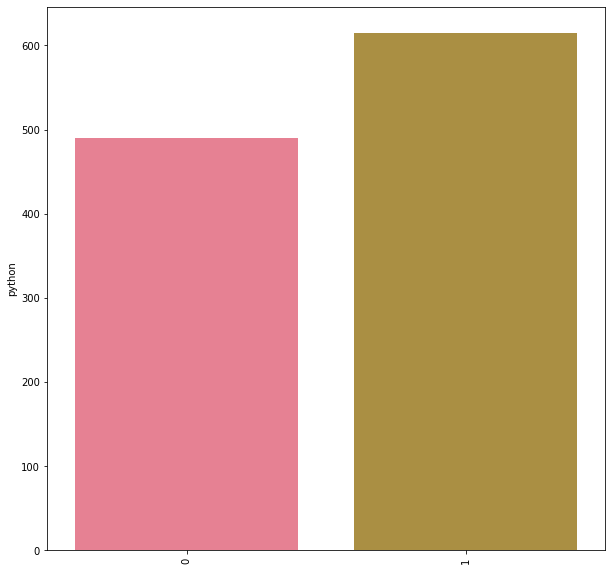

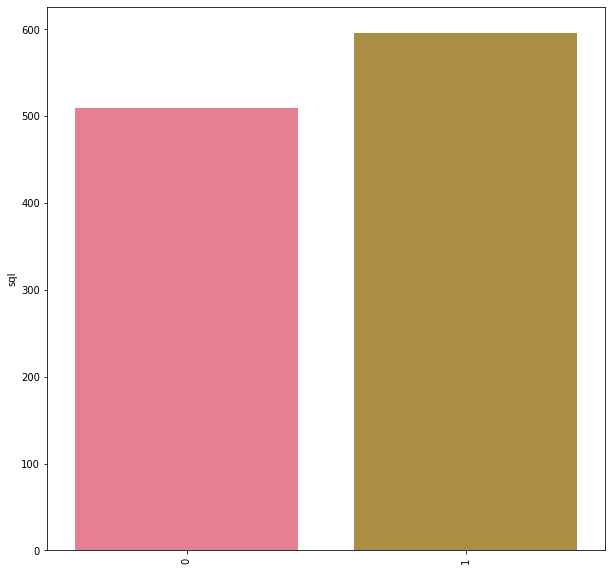

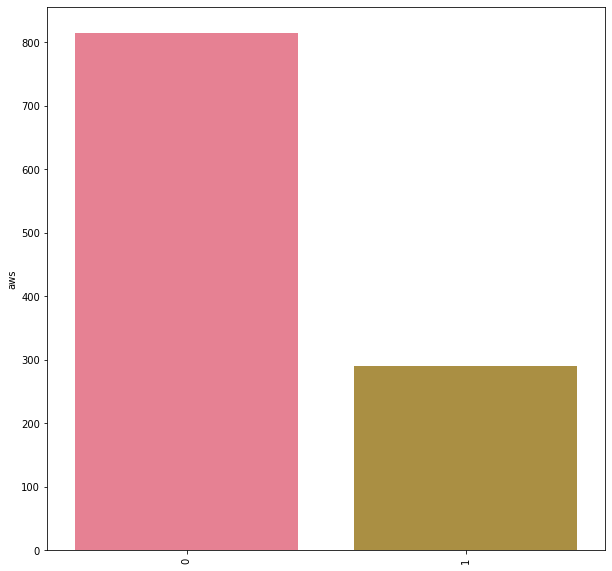

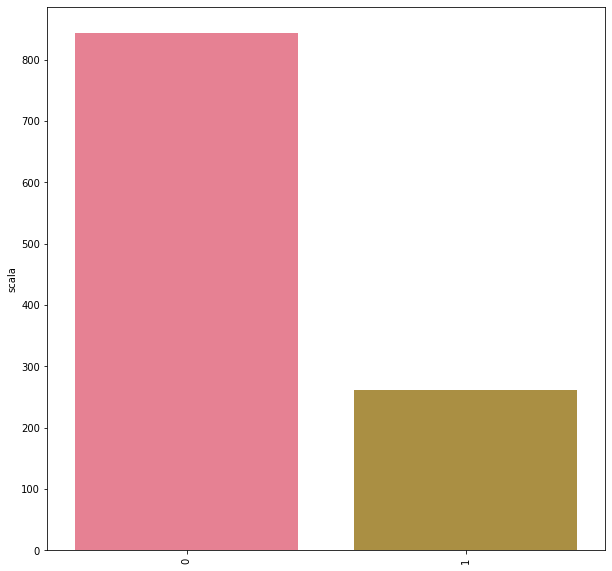

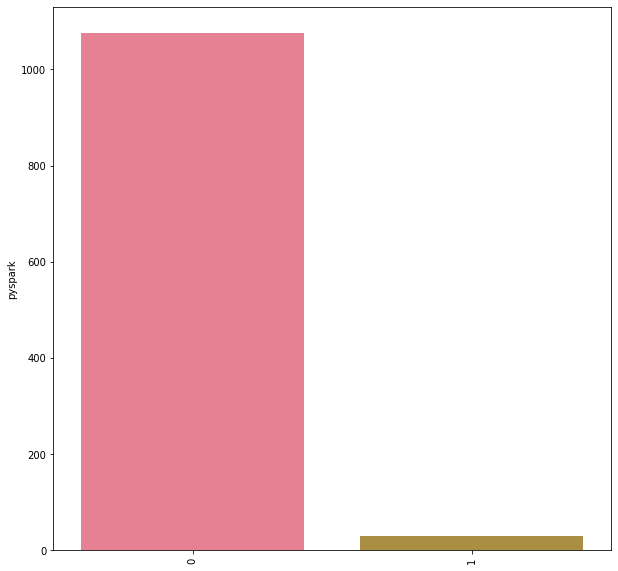

In [38]:

for i in df_columns.columns:
    plt.figure(figsize = (10,10))
    y = df_columns[i].value_counts()
    chart = sns.barplot(x=y.index, y=y)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

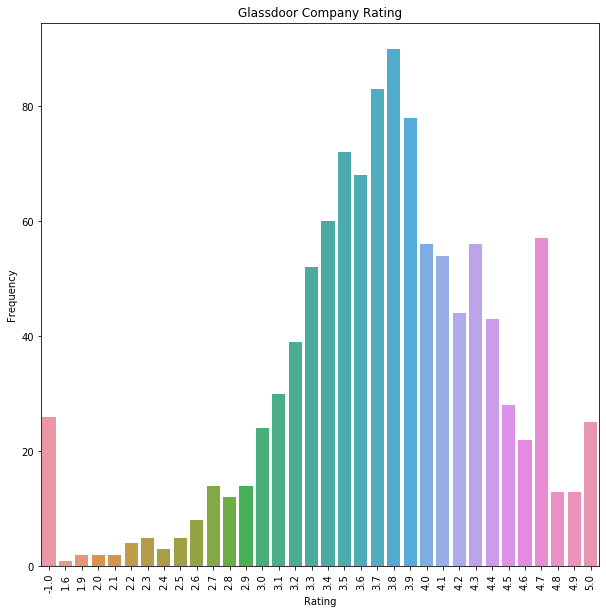

In [43]:
plt.figure(figsize = (10,10))
y = df['Rating'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Rating', ylabel = 'Frequency')
chart.set_title('Glassdoor Company Rating')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

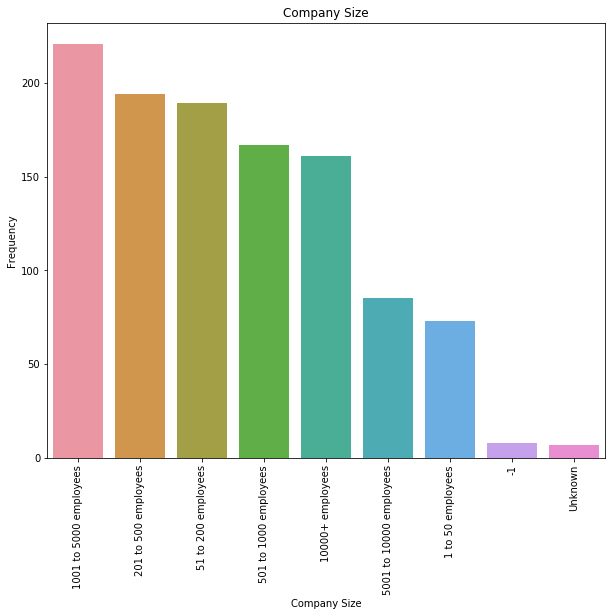

In [66]:
plt.figure(figsize = (10,8))
y = df['Size'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Company Size', ylabel = 'Frequency')
chart.set_title('Company Size')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

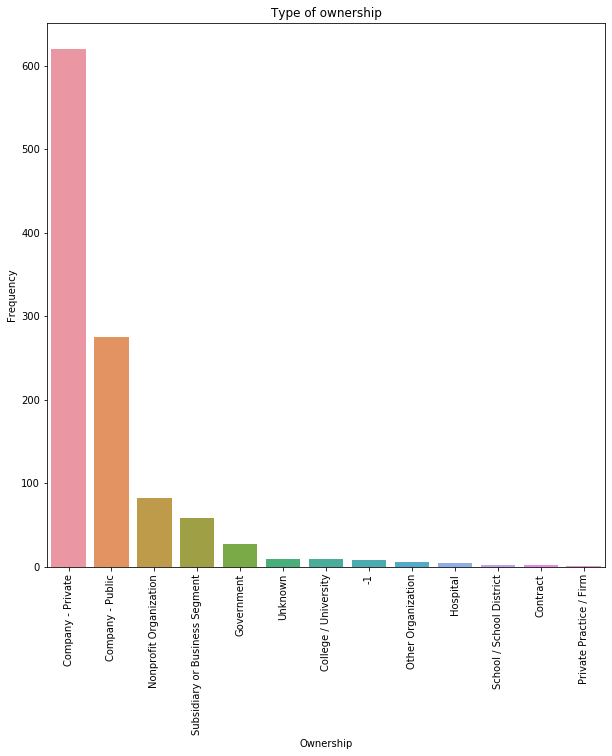

In [45]:
plt.figure(figsize = (10,10))
y = df['Type of ownership'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Ownership', ylabel = 'Frequency')
chart.set_title('Type of ownership')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

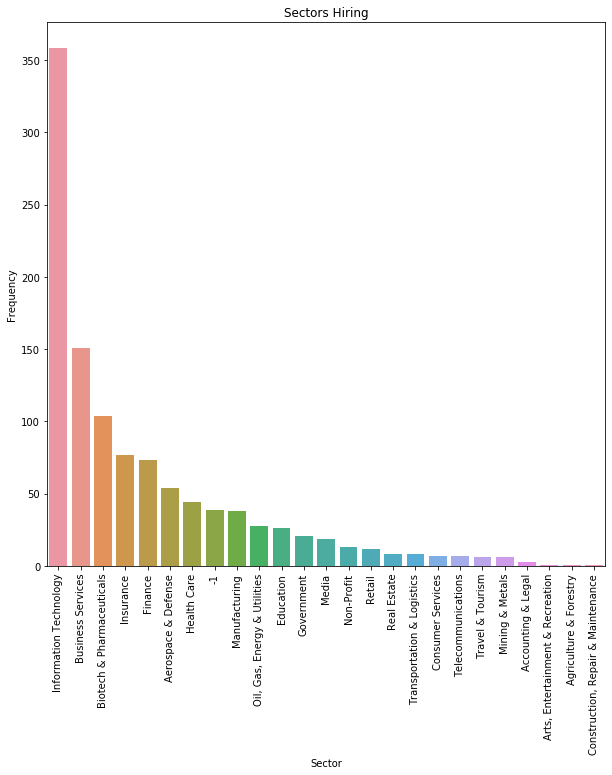

In [46]:
plt.figure(figsize = (10,10))
y = df['Sector'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Sector', ylabel = 'Frequency')
chart.set_title('Sectors Hiring')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

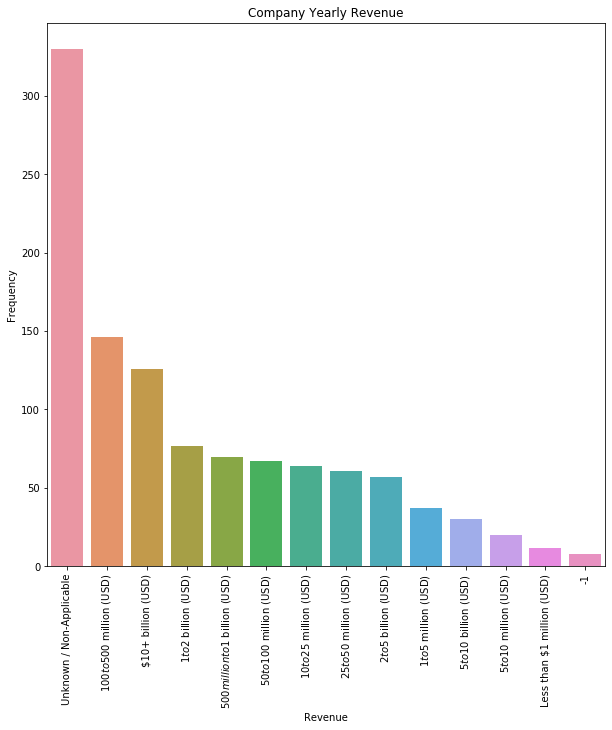

In [47]:
plt.figure(figsize = (10,10))
y = df['Revenue'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Revenue', ylabel = 'Frequency')
chart.set_title('Company Yearly Revenue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

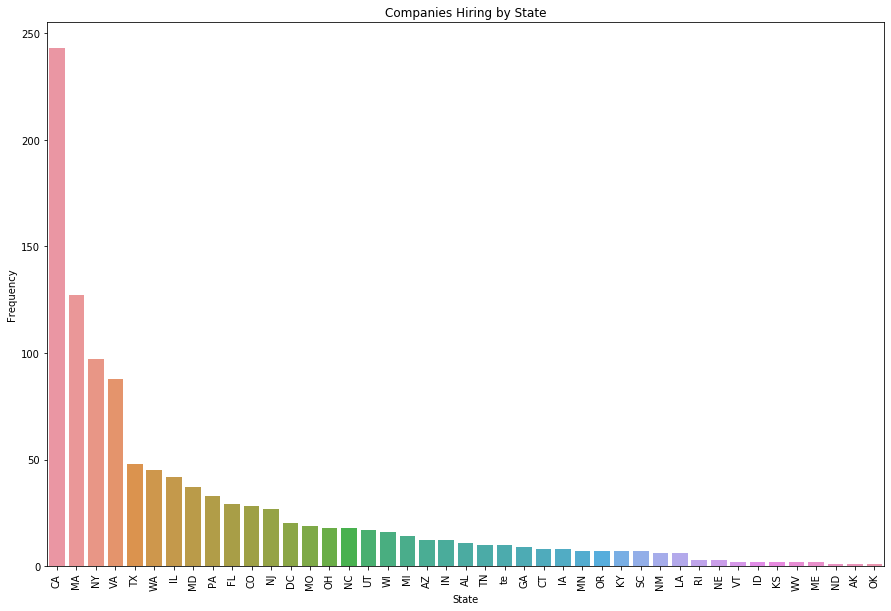

In [49]:
plt.figure(figsize = (15,10))
y = df['State'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='State', ylabel = 'Frequency')
chart.set_title('Companies Hiring by State')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

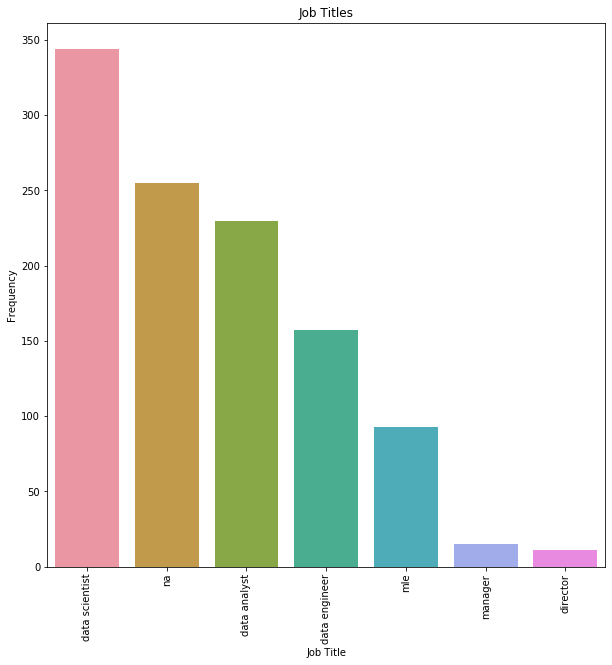

In [50]:
plt.figure(figsize = (10,10))
y = df['job_title'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Job Title', ylabel = 'Frequency')
chart.set_title('Job Titles')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

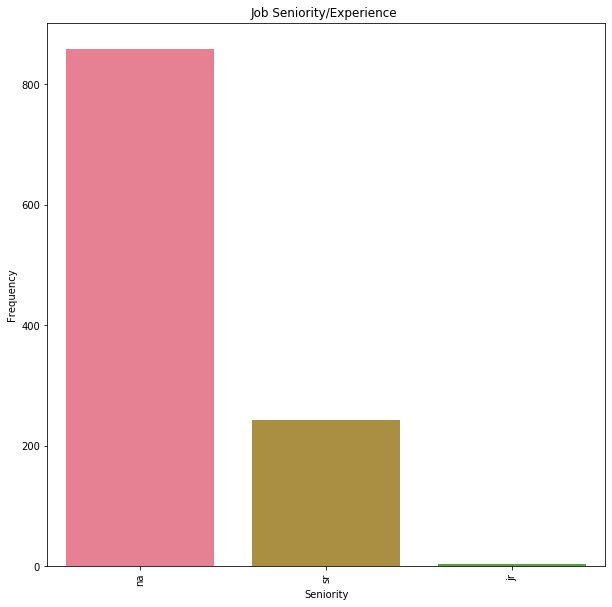

In [51]:
plt.figure(figsize = (10,10))
y = df['Seniority'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Seniority', ylabel = 'Frequency')
chart.set_title('Job Seniority/Experience ')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

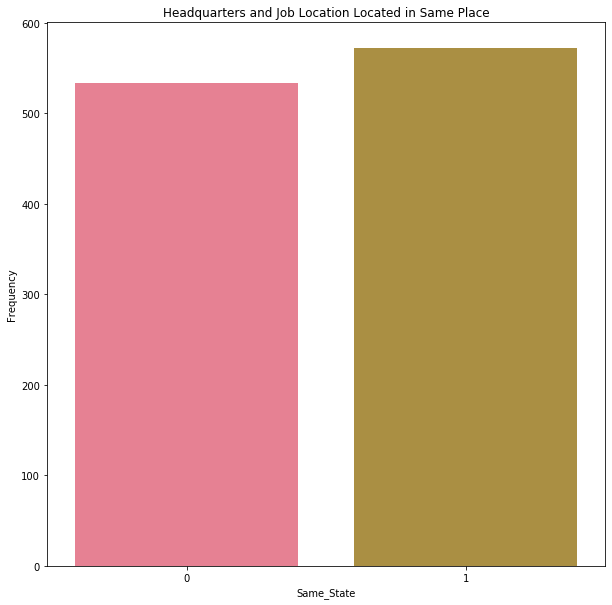

In [53]:
plt.figure(figsize = (10,10))
y = df['Same_State'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Same_State', ylabel = 'Frequency')
chart.set_title('Headquarters and Job Location Located in Same Place')
plt.show()

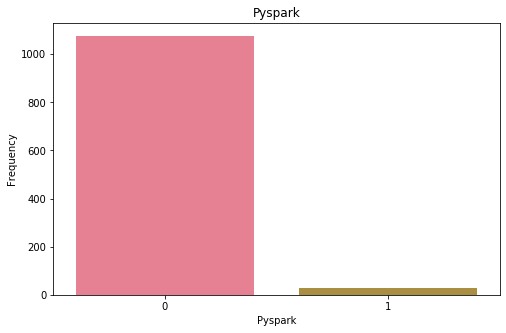

In [56]:
plt.figure(figsize = (8,5))
y = df['pyspark'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Pyspark', ylabel = 'Frequency')
chart.set_title('Pyspark')
plt.show()

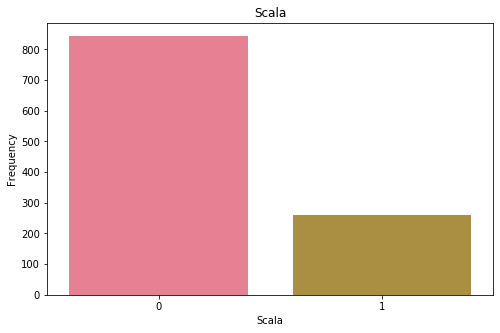

In [57]:
plt.figure(figsize = (8,5))
y = df['scala'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Scala', ylabel = 'Frequency')
chart.set_title('Scala')
plt.show()

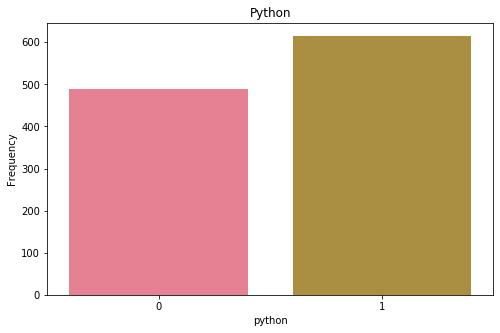

In [59]:
plt.figure(figsize = (8,5))
y = df['python'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='python', ylabel = 'Frequency')
chart.set_title('Python')
plt.show()

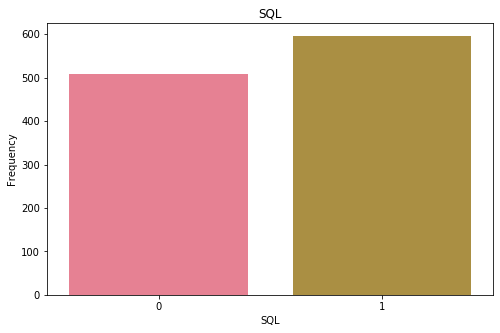

In [60]:
plt.figure(figsize = (8,5))
y = df['sql'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='SQL', ylabel = 'Frequency')
chart.set_title('SQL')
plt.show()

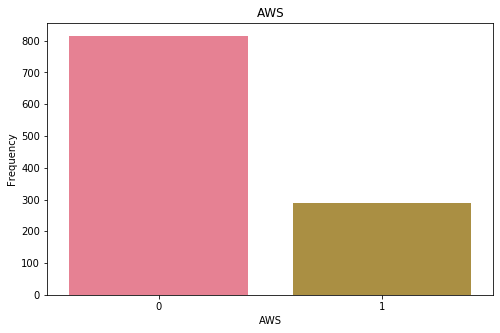

In [61]:
plt.figure(figsize = (8,5))
y = df['aws'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='AWS', ylabel = 'Frequency')
chart.set_title('AWS')
plt.show()

In [21]:
df['Seniority'].value_counts().index

Index(['na', 'sr', 'jr'], dtype='object')